In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [8]:
news_df = pd.read_csv("news_preprocessed.csv")
news_df = news_df.dropna(subset=['preprocessed_text'])


In [9]:
news_df.head()

,title,text,subject,date,Label,preprocessed_text
0,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,2015-03-31,Fake,making room hillary president obama today anno...
1,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,2015-03-31,Fake,irony lost us hillary compared president wante...
2,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,Fake,anyone really think hillary clinton come clean...
3,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,Fake,nothing like political cronyism make stomach c...
4,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,Fake,case missed harry reid announced last week ret...


In [15]:
# Separate the dataset into two subsets based on the 'Label'
df_fake = news_df[news_df['Label'] == 'Fake']
df_real = news_df[news_df['Label'] == 'Real']

In [16]:
# Tokenize and count the frequency of words in fake news
words_fake = ' '.join(df_fake['preprocessed_text']).split()
counter_fake = Counter(words_fake)

# Tokenize and count the frequency of words in real news
words_real = ' '.join(df_real['preprocessed_text']).split()
counter_real = Counter(words_real)

# Get the 20 most common words in fake and real news
most_common_words_fake = counter_fake.most_common(20)
most_common_words_real = counter_real.most_common(20)

most_common_words_fake, most_common_words_real

([('trump', 74241),
  ('said', 31149),
  ('people', 26015),
  ('president', 25772),
  ('would', 23461),
  ('one', 22995),
  ('clinton', 18085),
  ('obama', 17920),
  ('like', 17660),
  ('donald', 17235),
  ('also', 15243),
  ('new', 14198),
  ('news', 14197),
  ('us', 13922),
  ('even', 13690),
  ('hillary', 13673),
  ('white', 12797),
  ('time', 12792),
  ('state', 12543),
  ('via', 11355)],
 [('said', 99037),
  ('trump', 54249),
  ('would', 31526),
  ('reuters', 28412),
  ('president', 26397),
  ('state', 19728),
  ('government', 18288),
  ('new', 16784),
  ('house', 16519),
  ('states', 16515),
  ('also', 15946),
  ('united', 15576),
  ('republican', 15346),
  ('people', 15138),
  ('told', 14244),
  ('could', 13709),
  ('one', 12676),
  ('last', 12613),
  ('party', 12436),
  ('washington', 12419)])

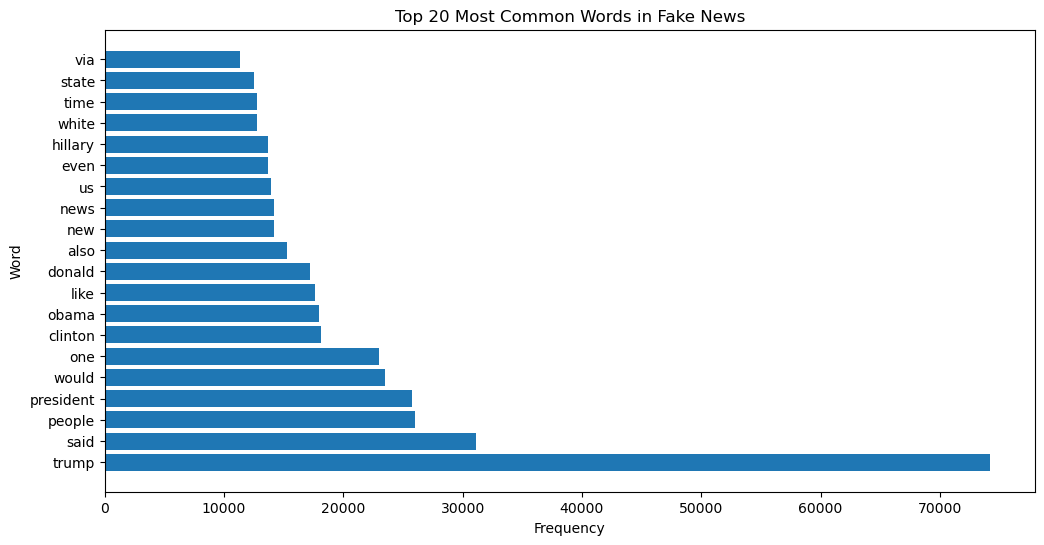

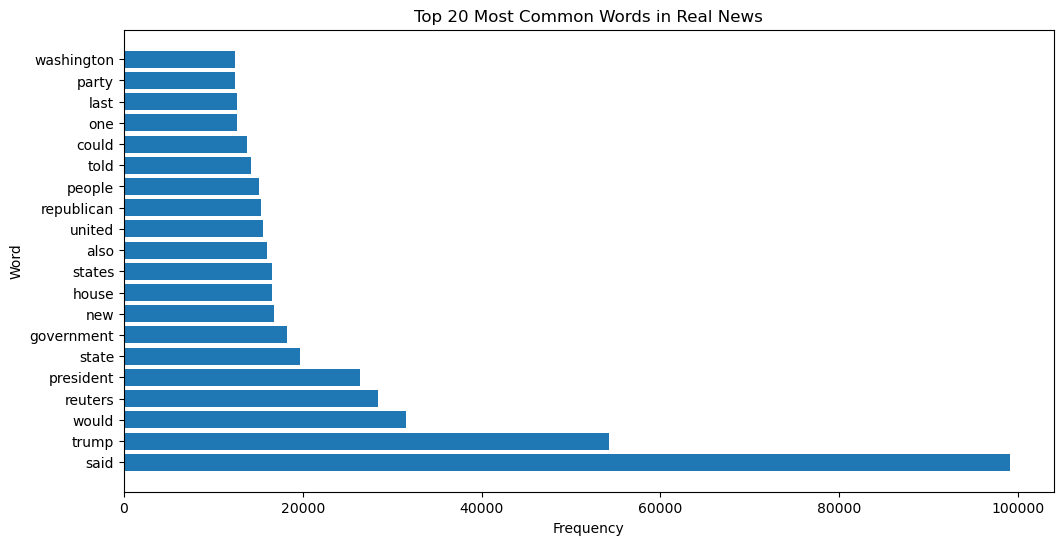

In [17]:
# Plotting the most common words for Fake news
plt.figure(figsize=(12, 6))
plt.barh([word[0] for word in most_common_words_fake], [word[1] for word in most_common_words_fake])
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Common Words in Fake News')
plt.show()

# Plotting the most common words for Real news
plt.figure(figsize=(12, 6))
plt.barh([word[0] for word in most_common_words_real], [word[1] for word in most_common_words_real])
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Common Words in Real News')
plt.show()

Let's generate word clouds

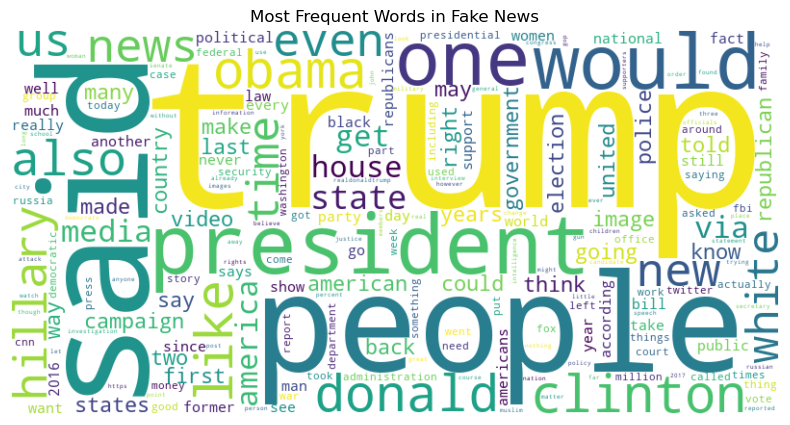

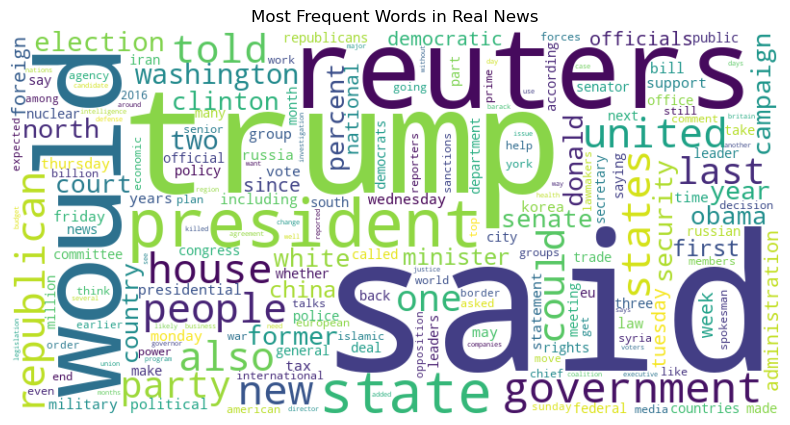

In [28]:
from wordcloud import WordCloud

# Generate word clouds
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for Fake and Real news
generate_wordcloud(counter_fake, 'Most Frequent Words in Fake News')
generate_wordcloud(counter_real, 'Most Frequent Words in Real News')


Just use the "preprocessed_text" and "Label" columns

In [18]:
# Prepare the features and labels
X = news_df['preprocessed_text']
y = news_df['Label']

Convert the text data into TF-IDF vectors

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 most frequent words for demonstration
X_tfidf = tfidf_vectorizer.fit_transform(X)

Split the dataset

In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# Make predictions on the testing set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.9971757794848621,
 '              precision    recall  f1-score   support\n\n        Fake       1.00      1.00      1.00      4608\n        Real       1.00      1.00      1.00      4244\n\n    accuracy                           1.00      8852\n   macro avg       1.00      1.00      1.00      8852\nweighted avg       1.00      1.00      1.00      8852\n')